Given an overdetermined system $Ax=b$, we can determine the coefficients $x$ as below :

$$ x = (A^{T}A)^{-1}A^{T}b $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data 1

data_x = np.array([2,4,6,8])
data_y = np.array([3,7,5,10])

# data 2

# data_x = np.array([5,7,12,16,20])
# data_y = np.array([40,120,180,210,240])

# data 3

# temp = range(10)
# I = [temp[i]*0.4 for i in range(len(temp))]
# I.append(3.99)
# I = np.array(I)
# intensity = np.array([0.1,0.9,3.6,8.6,15.6,24.5,34.5,45.0,58.5,71.7,85.2])
# data_x = I
# data_y = intensity

In [3]:
# defining the model variables

d = 3               # degree of fitting polynomial
l = len(data_x)
A = np.zeros((l,d+1),float)
b = data_y
for i in range(l):
    for j in range(d+1):
        A[i][j] = (data_x[i])**(d-j)

In [4]:
# fitting the data

def linear_fit(A,b):
    A_t = np.transpose(A)
    B = np.linalg.inv(np.matmul(A_t,A))
    x = np.matmul(np.matmul(B,A_t),b)
    return x

In [5]:
def fitted_func(x,x_value):
    y = 0
    for i in range(d,-1,-1):
        y+=x[d-i]*x_value**i
    return y

Coefficients : [  0.27083333  -4.          18.41666667 -20.        ]


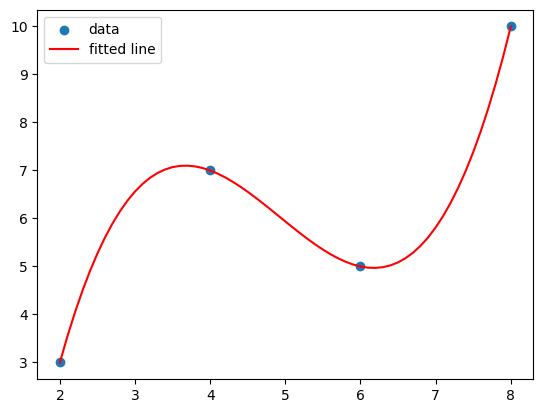

Sum Squared Error : 3.071635038313367e-25


In [6]:
# visualising data

x = linear_fit(A,b)
print('Coefficients :',x)
l,u,h = min(data_x),max(data_x),0.1
x_fit = np.arange(l,u+h,h)
y_fit = fitted_func(x,x_fit)
plt.scatter(data_x,data_y,label = 'data')
plt.plot(x_fit,y_fit,c='red',label = 'fitted line')
# plt.ylabel('Detector Currect (in micro-ampere)')
# plt.xlabel('Current (in ampere)')

plt.legend()
plt.show()

# Sum squared Error : SSE

sse = 0
for i in range(l):
    sse =+ (data_y[i]-fitted_func(x,data_x[i]))**2
print('Sum Squared Error :',sse)